In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

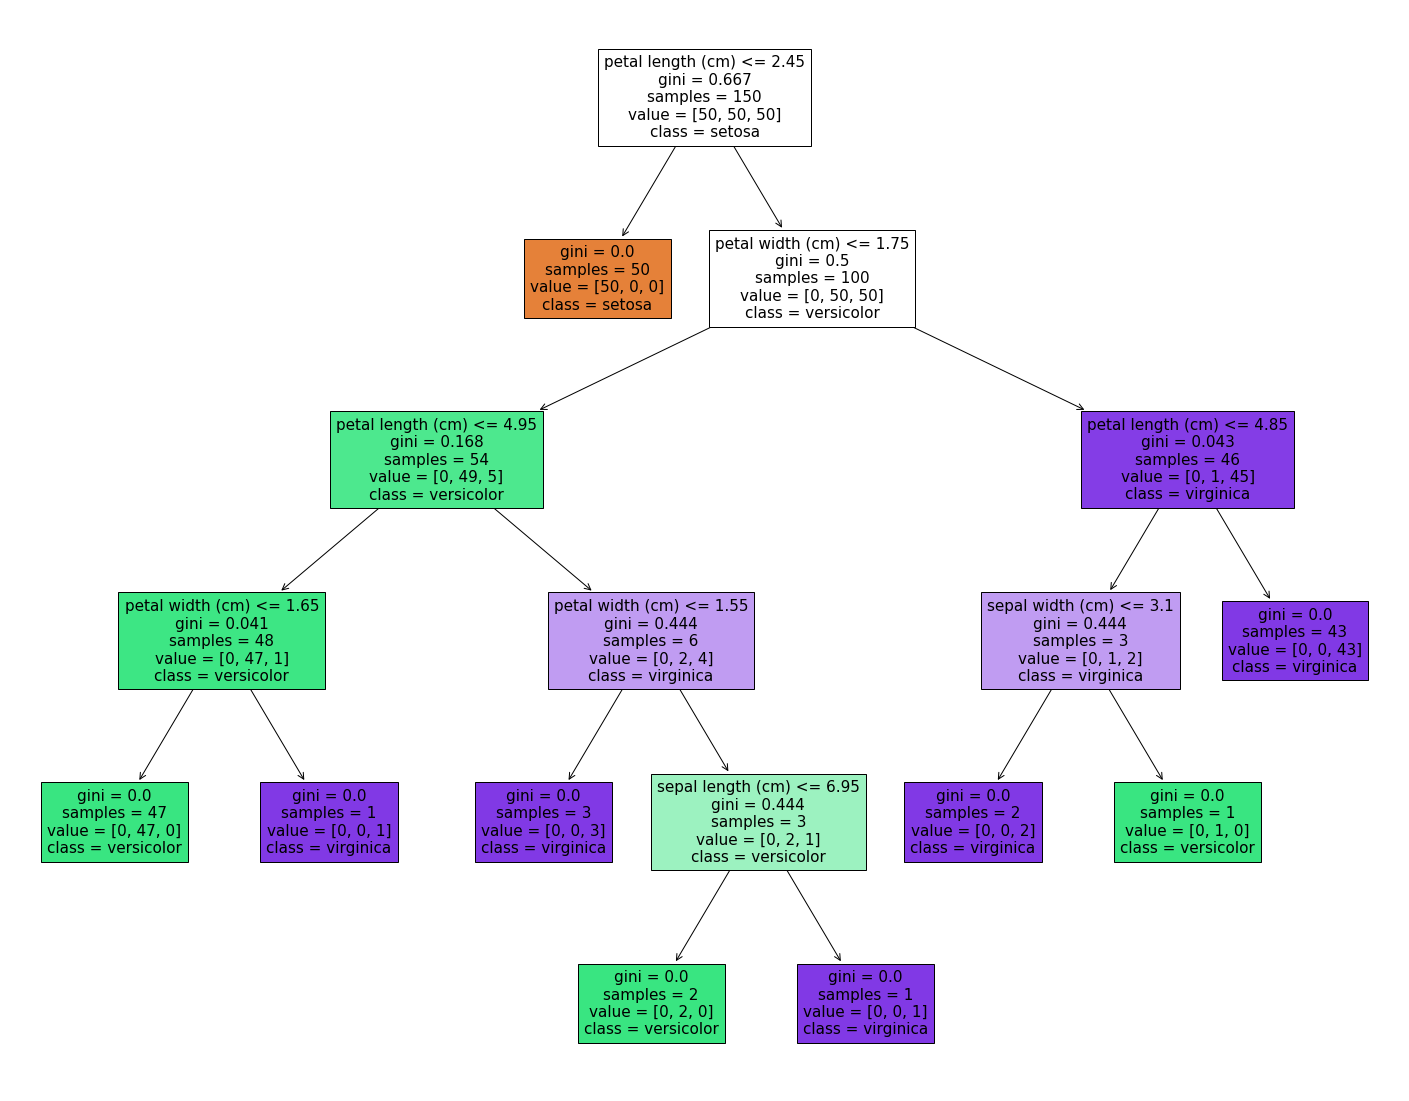

In [4]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
                

In [5]:
def generate_nonstationary_pure_stoch(range_0, range_1):
    cst = 0
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = l[-1] + random
        else:
            y = cst
        l.append(y)
    return l

series = generate_nonstationary_pure_stoch(0, 30)

In [6]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace = True)
    return agg

In [7]:
data = series_to_supervised(series, n_in = 2)
data

,var1(t-2),var1(t-1),var1(t)
2,0.000000,1.322982,3.929713
3,1.322982,3.929713,5.598085
4,3.929713,5.598085,5.653108
5,5.598085,5.653108,5.768494
6,5.653108,5.768494,5.358568
7,5.768494,5.358568,5.574964
8,5.358568,5.574964,6.579091
9,5.574964,6.579091,5.827872
10,6.579091,5.827872,4.888336
11,5.827872,4.888336,4.032028


In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
clf = DecisionTreeRegressor(random_state=1234, max_depth=3)
model = clf.fit(X, y)

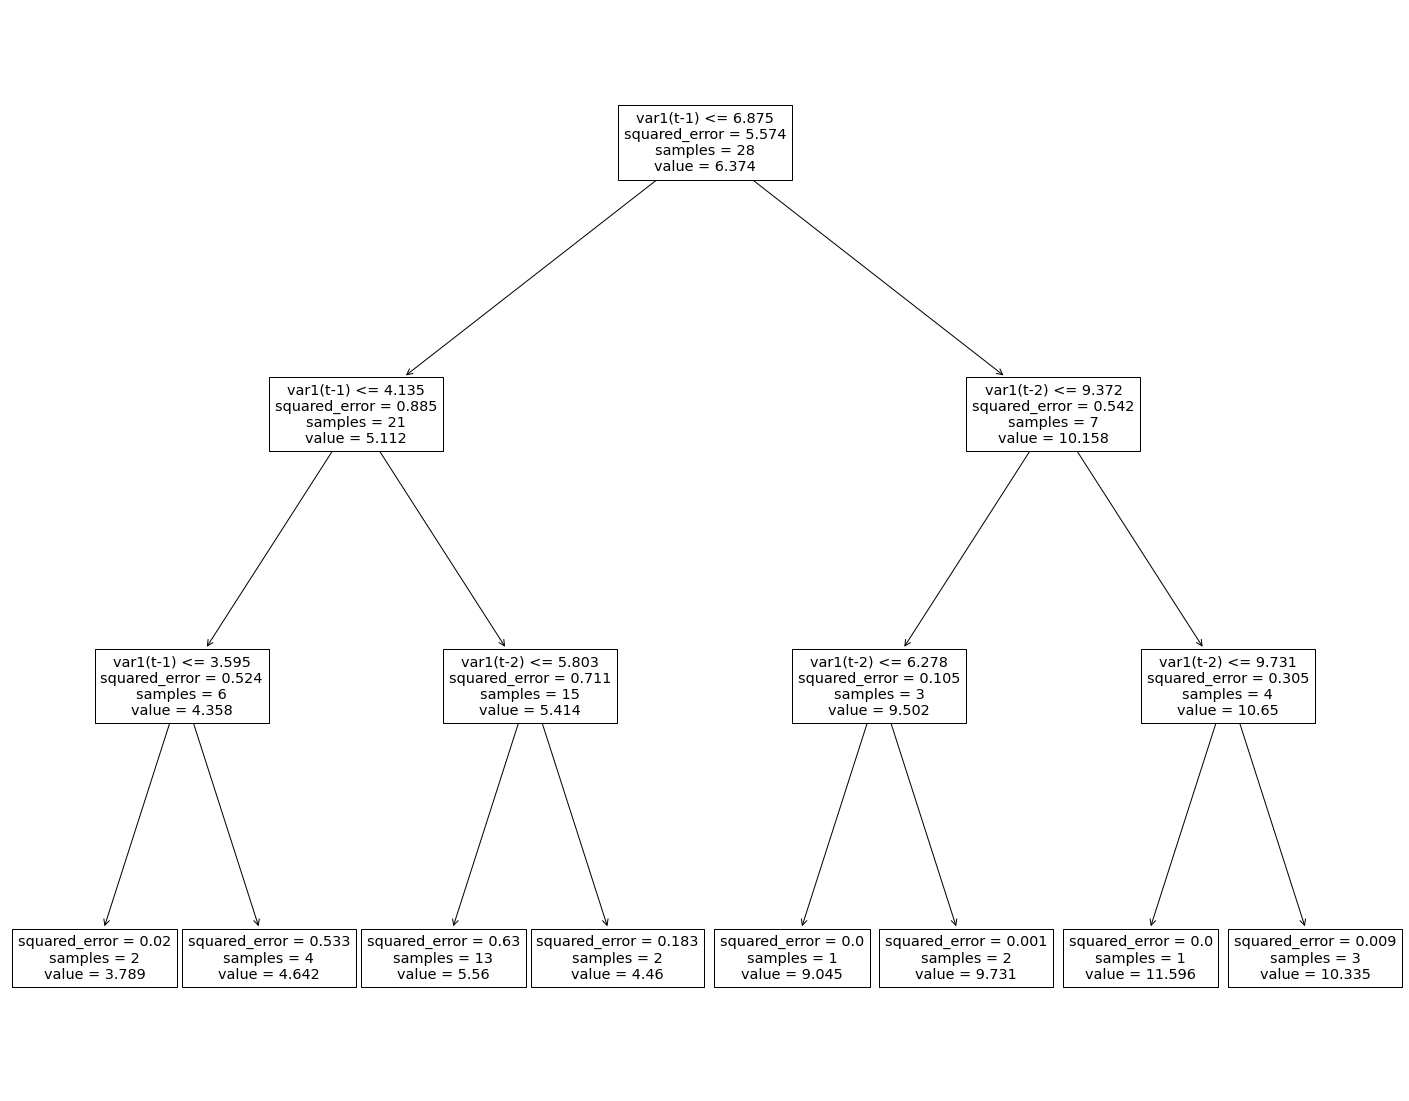

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=data.columns[:-1],  
                   filled=False)
fig.savefig("decistion_tree.png")